# Street Easy
This project will fit a multiple linear regression model to the data of [StreetEasy](https://streeteasy.com) to try and predict the price of the rental. The data contains a sample of 5,000 rentals of `Manhattan`, `Brooklyn`, and `Queens` that are active on StreetEasy in June 2016.

The data has the next columns: 
- `rental_id`: rentaID
- `rent`: price of rent in dollars
- `bedrooms`: number of bedrooms
- `bathrooms`: number of bathrooms
- `size_sqft`: size in square feet
- `min_to_subway`: distance from subway station in minutes
- `floor`: floor number
- `building_age_yrs`: building’s age in years
- `no_fee`: does it have a broker fee? (0 for fee, 1 for no fee)
- `has_roofdeck`: does it have a roof deck? (0 for no, 1 for yes)
- `has_washer_dryer`: does it have washer/dryer in unit? (0/1)
- `has_doorman`: does it have a doorman? (0/1)
- `has_elevator`: does it have an elevator? (0/1)
- `has_dishwasher`: does it have a dishwasher (0/1)
- `has_patio`: does it have a patio? (0/1)
- `has_gym`: does the building have a gym? (0/1)
- `neighborhood`: (ex: Greenpoint)
- `borough`: (ex: Brooklyn)

## Import Python Modules
First, import the preliminary modules that will be used in this project:

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

## Manhattan
Now, lets load the data of Manhattan into `rentals_manhattan` and see the information:

In [8]:
manhattan = pd.read_csv('https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/manhattan.csv')
manhattan.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


## Train and Test Set
Now, lets split the data into a train and test set to evaluate the model later on. A 80/20 ratio will be used.

In [9]:
# Function from sklearn to separate the data
from sklearn.model_selection import train_test_split

# Get the independent features to predict the rental price
X = manhattan[['bedrooms',
                            'bathrooms',
                            'size_sqft',
                            'min_to_subway',
                            'floor',
                            'building_age_yrs',
                            'no_fee',
                            'has_roofdeck',
                            'has_washer_dryer',
                            'has_doorman',
                            'has_elevator',
                            'has_dishwasher',
                            'has_patio',
                            'has_gym']]

y = rentals_manhattan['rent']

# Get the different data
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2, random_state=6)
print('Shapes of the train and test data')
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Shapes of the train and test data
(2831, 14)
(708, 14)
(2831,)
(708,)


## Fit the Model

Now, lets use the linear regression method in sklearn to fit the model and obtain the predicted values for the test data.

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

## Evaluation

For the last step on analyzing the rentals in Manhattan, lets see the score of the model using `score()`. This function gives the coefficient of determination $R^{2}$ that tells us how much our X features can explain the variation that exist on `Y`. As we can see below, both scores are above 0.7, which could be considered good.

In [19]:
print("Train score:")
print(model.score(X_train, y_train))
print()
print("Test score:")
print(model.score(X_test, y_test))

Train score:
0.7725460559817883

Test score:
0.8050371975357635


## Visualization

Now, lets plot the `y_train` data vs the actual `y` data to compare the predictions.

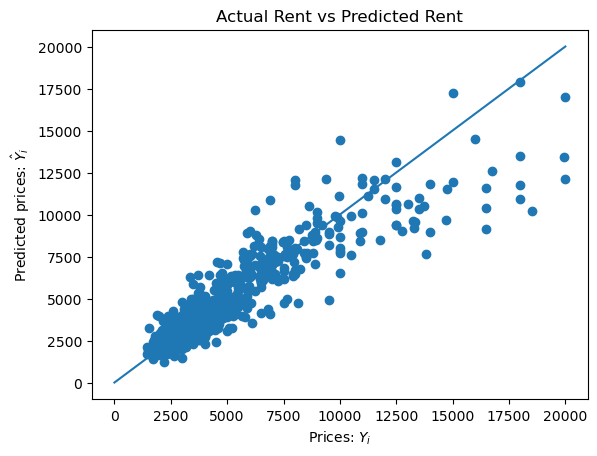

<Figure size 640x480 with 0 Axes>

In [16]:
plt.scatter(y_test, y_predicted)
plt.plot(range(20000), range(20000))

plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")

plt.show()
plt.clf()

## Brooklyn and Queens
Now that the model that predicted rental prices for Manhattan is done, lets now do the same for Brooklyn and Queens. First, lets load the data and visualize it.

In [17]:
brooklyn = pd.read_csv('https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/brooklyn.csv')
brooklyn.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2869,3600,3.0,2,900,4,1.0,15,1,0,0,0,0,0,0,0,Williamsburg,Brooklyn
1,4318,3900,3.0,2,1000,4,9.0,8,0,0,0,0,1,0,0,0,Greenwood,Brooklyn
2,6265,2700,2.0,1,900,4,2.0,96,0,0,0,0,0,0,0,0,Gowanus,Brooklyn
3,24,4900,1.0,1,1216,6,3.0,88,0,0,0,0,0,0,0,0,Brooklyn Heights,Brooklyn
4,9481,3900,0.0,1,1100,3,4.0,85,1,0,0,0,0,0,0,0,Williamsburg,Brooklyn


In [18]:
queens = pd.read_csv('https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/queens.csv')
queens.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,10234,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Queens
1,10524,1950,1.0,1,950,1,3.0,83,0,0,0,0,0,0,0,0,Forest Hills,Queens
2,5465,3500,1.0,1,996,9,7.0,3,1,0,0,0,0,0,0,0,Astoria,Queens
3,5259,1725,1.0,1,800,1,2.0,89,0,0,0,0,0,0,0,0,Astoria,Queens
4,9736,1700,1.0,1,730,10,3.0,7,0,0,0,0,0,0,0,0,Briarwood,Queens


## Fit the Model
Now, lets separate the data into training data and test data for both datasets and fit the model.

### Brooklyn
Lets start first for creating the model for the Brooklyn data set.

In [20]:
# Get the independent features to predict the rental price
X = brooklyn[['bedrooms',
            'bathrooms',
            'size_sqft',
            'min_to_subway',
            'floor',
            'building_age_yrs',
            'no_fee',
            'has_roofdeck',
            'has_washer_dryer',
            'has_doorman',
            'has_elevator',
            'has_dishwasher',
            'has_patio',
            'has_gym']]

y = brooklyn['rent']

# Get the different data
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2, random_state=6)

model = LinearRegression()
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

#### Evaluation
Now, lets see the coefficient of determination to find how the model performed.

In [22]:
print("Train score:")
print(model.score(X_train, y_train))
print()
print("Test score:")
print(model.score(X_test, y_test))

Train score:
0.6132214537979526

Test score:
0.5843499238725762


#### Improvement
Lets try improving the score of the model. First, lets see the coefficients of each feature to see how can they be modified for the improvement of the model

In [24]:
model.coef_

array([-196.67177625,  785.40073377,    2.94579148,  -37.78690683,
         13.01784892,   -4.10092423,  123.089506  ,   99.61520874,
        -14.55629062, -330.26816471,   85.07118067,  -11.78666927,
        260.68383056,  396.24793842])

Lets see how the model performs when the variables that have the least amount of weight are removed. As seen below, even when some variables are removed the test score increases some decimals and the train set decrease a small amount. By chaning some data, the columns that start with `has_` are the ones that when removed the scores dont change too much. The one column that its change affected the most the scores was `size_sqft`. 

In [71]:
# Get the independent features to predict the rental price
X = brooklyn[['bedrooms',
            'bathrooms',
            'size_sqft',
            #'min_to_subway',
            'floor',
            'building_age_yrs',
            'no_fee',
            'has_roofdeck',
            'has_washer_dryer',
            'has_doorman',
            'has_elevator',
            'has_dishwasher',
            'has_patio',
            #'has_gym' 
             ]]

y = brooklyn['rent']

# Get the different data
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2, random_state=6)

model = LinearRegression()
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

print("Train score:")
print(model.score(X_train, y_train))
print()
print("Test score:")
print(model.score(X_test, y_test))

Train score:
0.6047749476710153

Test score:
0.5882514201153065


array([-184.03897773,  785.22282872,    2.90894767,   16.16865539,
         -3.99985573,  141.38104631,  184.45446498,   70.59533585,
       -197.89199077,  171.62471826,  -10.81411791,  359.31702643])

### Queens
Lets do the same for the dataset of Queens. First train and evaluate the model.

In [75]:
# Get the independent features to predict the rental price
X = queens[['bedrooms',
            'bathrooms',
            'size_sqft',
            'min_to_subway',
            'floor',
            'building_age_yrs',
            'no_fee',
            'has_roofdeck',
            'has_washer_dryer',
            'has_doorman',
            'has_elevator',
            'has_dishwasher',
            'has_patio',
            'has_gym']]

y = queens['rent']

# Get the different data
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2, random_state=6)

model = LinearRegression()
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

print("Train score:")
print(model.score(X_train, y_train))
print()
print("Test score:")
print(model.score(X_test, y_test))

Train score:
0.6658360310089573

Test score:
0.6651703197808251


#### Improvement
Lets now see the coefficients and see if removing or changing any columns improve the result. 

In [76]:
model.coef_

array([ 259.49483776,  472.15466299,    0.97777539,  -10.29535775,
         33.05646388,   -8.12803401,  259.14494075,   62.78960059,
        124.40966155,   56.38161397,  157.69503746, -195.65879788,
        237.50188285,   84.89712538])

Similar to the case of Brooklyn, removing some variables cause the scores to go a little down. The variables starting with `has_` again are the ones with the least amount of impact on the score. 

In [86]:
# Get the independent features to predict the rental price
X = queens[['bedrooms',
            'bathrooms',
            'size_sqft',
            'min_to_subway',
            'floor',
            'building_age_yrs',
            'no_fee',
            'has_roofdeck',
            'has_washer_dryer',
            'has_doorman',
            'has_elevator',
            'has_dishwasher',
            'has_patio',
            'has_gym' 
             ]]

y = queens['rent']

# Get the different data
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2, random_state=6)

model = LinearRegression()
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

print("Train score:")
print(model.score(X_train, y_train))
print()
print("Test score:")
print(model.score(X_test, y_test))

Train score:
0.6658360310089573

Test score:
0.6651703197808251


## Conclusion
From using the data and creating the model, overall the scores and predictions where good. The one with the greates score and most accurate wa